<a href="https://colab.research.google.com/github/brenocavi/Presentation/blob/main/Copy_of_%5BTemplate%5D_Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Montreal*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Montreal, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


Os dados utilizados nessa análise foram adquiridos no [Inside Airbnb](https://http://insideairbnb.com/get-the-data/).

Dentre as cidades disponiveis no site, eu escolhi realizar anánlise da cidade de Motreal/Canadá. Os dados aqui apresentados são do dia 12 de Setembro de 2022. Foi utilizado apenas o arquivo: 


*   *listings.csv - Summary information and metrics for listings in Montreal (good for visualisations).*





In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('/content/listings.csv')

## Análise dos Dados


Nesta etapa o objetivo é entender os dados. Quais são os tipo de dados (texto/números), o que estes podem representam e como estão estruturados.

**Dicionário das variáveis**

* **id** - número de identificação do imóvel.
* **name** - nome da imóvel anunciado.
* **host_id** - número de identificação do proprietário do imóvel.
* **neighbourhood_group** - coluna sem valor válido.
* **neighbourhood** - bairro.
* **latitude** - coordenada geográfica com referência na Linha do Equador.
* **longitude** - coordenada geográfica com referência no Meridiano de Greenwich.
* **room_type** - tipo de quarto ofertado.
* **price** - o preço por dia.
* **minimum_nights** - período mínimo de aluguel.
* **number_of_reviews** - quantidade de reviews que o imóvel possui na plataforma.
* **last_review** - data do último review.
* **reviews_per_month** - média de reviews por mês.
* **calculated_host_listings_count** - quantidade de imóveis do mesmo proprietário. 
* **calculated_host_listings_count** - quantidade de dias de disponibilidade no período de 365 dias. 
* **number_of_reviews_ltm** - número de reviews nos últimos doze meses.
* **license** - autorização do governo para que imóvel possa se disponibilizado para locação no site do Airbnb.

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,298059,Superb cottage Mile-End Plateau !,1536474,Helene,NaN,Le Plateau-Mont-Royal,45.52665,-73.60730,Entire home/apt,180,30,52,2014-10-18,0.40,1,104,0,NaN
1,2843,Fabulous downtown/airport room,2319,Gail,NaN,Le Sud-Ouest,45.48496,-73.58001,Private room,60,30,157,2022-08-21,0.97,2,80,5,NaN
2,309367,Charming and Clean ! 5 min Métro,1562348,Virginie,NaN,Villeray-Saint-Michel-Parc-Extension,45.55169,-73.60007,Entire home/apt,64,180,22,2015-08-13,0.18,3,74,0,NaN
3,29059,Lovely studio Quartier Latin,125031,Maryline,NaN,Ville-Marie,45.51939,-73.56482,Entire home/apt,152,2,385,2022-09-02,2.58,2,306,54,NaN
4,29061,Maison historique - Quartier Latin,125031,Maryline,NaN,Ville-Marie,45.51929,-73.56493,Entire home/apt,286,3,108,2022-08-29,0.84,2,250,27,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [4]:
# identificar o volume de dados do DataFrame

print('O Dataset possui {} entradas'.format(df.shape[0]))
print('O Dataset possui {} variáveis'.format(df.shape[1]))

O Dataset possui 13621 entradas
O Dataset possui 18 variáveis


In [5]:
# Mostra o nome de cada variável
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [6]:
# O tipo de variável (string, número inteiro, número decimal) em cada coluna.
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

O Dataset é composto por um total de 13621 imóveis diferentes, com 18 tipos de variáveis (colunas). Já é possivel perceber que em algumas colunas temos dados ausentes.

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [7]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
((df.isnull().sum()/df.shape[0])*100).sort_values(ascending=False)

neighbourhood_group               100.000000
license                            93.532046
reviews_per_month                  18.897291
last_review                        18.897291
name                                0.029366
host_name                           0.007342
number_of_reviews                   0.000000
number_of_reviews_ltm               0.000000
availability_365                    0.000000
calculated_host_listings_count      0.000000
id                                  0.000000
minimum_nights                      0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
price                               0.000000
dtype: float64

In [8]:
df.license.unique()

array([nan, '261 026', '305995', '271530', '310728', '249454',
       '735374308RT0001', '307546', '310331',
       'Numéro établissement CITQ :\xa0263966', '221373', '1169743656',
       '266641', '263141', '257530', '306072', '301568', '308396',
       '307397', '299969', '303664', '308905', 'CITQ:267234', '286775',
       '307396', '301286', 'CITQ#304975', '304909', '281470', '306732',
       '304615', '306955', '281282', '299353', '274201', '303170',
       'No CITQ: 305895', '275601', '230370', '301128', '307763',
       '300651', '307822', '309323', '297531', '303164', 'Citq305642',
       '302264', 'CITQ # 247671', 'CITQ # 272241', 'CITQ # 279355',
       '289785', '307329', '218105', '279300', '305171', '222528',
       '308163', 'CITQ # 286731', '277922', '280350', '310063',
       'CITQ # 286720', '279915', '308907', 'CITQ 282262', 'CITQ:#309495',
       '286904', '308210', '302655', 'CITQ # 292353', '296323', '295699',
       '294243', 'CITQ # 309935', '296619', 'CITQ #29188

O conjunto de dados apresenta poucos dados faltantes, sendo "criticos" apenas duas colunas.


* As colunas *neighbourhood_group* e *license* são as que possuem maior quantidade de dados ausentes, ultrapassando **90 %**. 
*Foi retirado essas colunas do dataset, uma vez que a primeira não apresenta nenhum dado, e a segunda por ter pouco dados e ser informação especifica (documentação disponibilizada pelo governo).







In [9]:
df.drop(['neighbourhood_group', 'license'], axis=1, inplace=True)

In [10]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
((df.isnull().sum()/df.shape[0])*100).sort_values(ascending=False)

last_review                       18.897291
reviews_per_month                 18.897291
name                               0.029366
host_name                          0.007342
id                                 0.000000
host_id                            0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
dtype: float64

O Dataset segue agora com valor próximo de **19%** como a variével com maior quantidade de valores ausentes.

### **Q3. Qual o tipo de distribuição das variáveis?** 

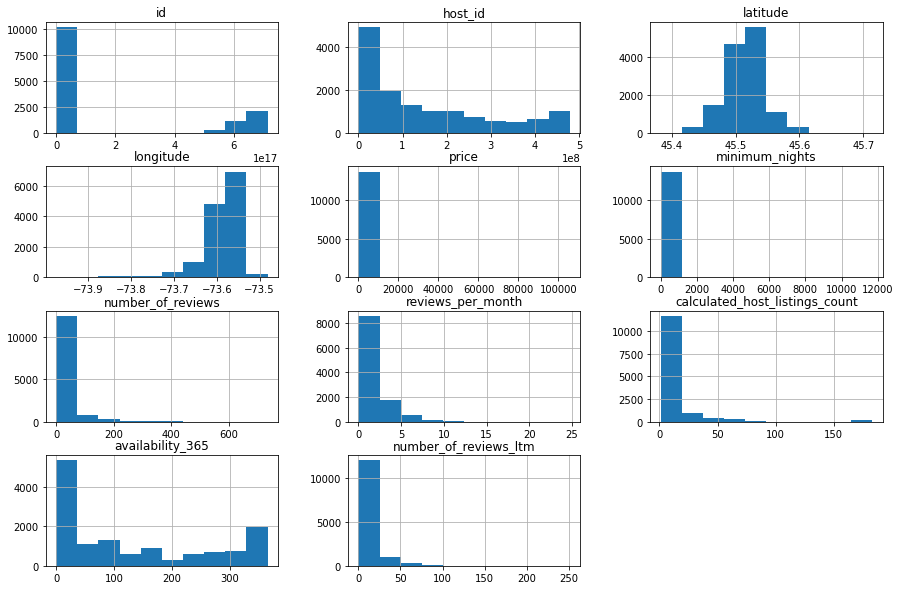

In [11]:
# plotar o histograma das variáveis numéricas
df.hist(bins = 10, figsize=(15,10));

Do ponto de vista de uma pessoa que vá alugar um imóvel durante sua estadia na cidade, provavelmente as questões de preço e mínimo de noite seriam os principais fatores levados em consideração. Analisando a ditribuição dos dados da coluna *price* e *minimum_nights*, é possível dizer que os valores estão concentrados no intervalo de 0 - 10000, porém é uma concentração espassada. Por apresentarem outras colunas de valores mais elevaos, possivelmente existe dados destoantes.

In [12]:
# resumo estatistico das variaveis numéricas 
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,13621.000000,13621.000000,13621.000000,11047.000000,13621.000000,13621.000000
mean,169.029073,15.623523,23.994200,1.498029,10.141473,128.566405
std,958.044866,108.486987,49.724181,1.873254,24.852071,133.881257
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,65.000000,1.000000,1.000000,0.160000,1.000000,0.000000
50%,109.000000,2.000000,6.000000,0.730000,2.000000,79.000000
75%,176.000000,21.000000,24.000000,2.210000,6.000000,258.000000
max,105634.000000,11684.000000,734.000000,24.730000,183.000000,365.000000


Atravês do método *describe* é possível ver que existe uma diferença entre a média (170) e a mediana (109). Possivelmente existem alguns *outliers* "puxando" o valor da média para cima. 

Para obter em números a quantidade de *outliers*, é possível aplicar a regra do IQR Score ([explicação mais detalhada](https:https://pt.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/identifying-outliers-iqr-rule//)). Basicamente, é um método matemático que o resultado fornecido é utilizado como limite inferior e superior, tendo por base a mediana, e os dados que ultrapassarem esses valores são considerados como *outliers*.


In [13]:
# identificando os outliers para a variável 'price'
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
IQR_price = q3_price - q1_price
print('IQR da variável price: ', IQR_price)

# definindo os limites                                       
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Limite superior de price: ', sup_price)
print('Limite inferior de price: ', inf_price)

IQR da variável price:  111.0
Limite superior de price:  342.5
Limite inferior de price:  -101.5


Os resultados da formula demonstram que valores acima de 342.5 podem ser considerados *outliers*, antes de aplicar esse filtro nos daddos é necessário vizualiar a porcentagem dados que estão nessa condição.

Para o limite inferior o Dataset não possui *outliers*, porém, o valor mínimo é 0 o que faz sentido para essa analise, um vez que, a pessoa que alugual o imóvel espera ter lucro com essa atividade. Dessa forma foi utilizado valor de 20, pois, ao assumir a cotação (real-dolar) do dia 26/09/2022 com 20 dolares é possivel alugar uma barraca em um dos anuncios visualizados no site.

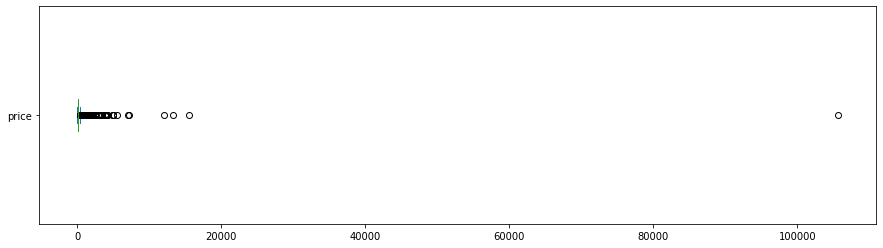

Quantidade de valores acima de 350: 909 entradas
Representa 6.67 % do total de entradas
Quantidade de valores abaixo de 20: 102 entradas
Representa 0.75 % do total de entradas


In [14]:
# Boxplot para outliers da variável preço 
df['price'].plot.box(vert=False, figsize=(15,4))
plt.show()

print('Quantidade de valores acima de 350: {} entradas'.format(len(df[df.price> 350])))
print('Representa {:.2f} % do total de entradas'.format((len(df[df.price> 350])/df.shape[0])*100))
print('Quantidade de valores abaixo de 20: {} entradas'.format(len(df[df.price < 20])))
print('Representa {:.2f} % do total de entradas'.format((len(df[df.price<20])/df.shape[0])*100))



Para o limite superior foi arrendondado o valor para 350. Por representar **6.67%** apenas, do total dos dados, a análise seguiu com esse filtro.

In [15]:
# identificando os outliers para a variável 'minimum_nights'
q1_minimum_nights = df.minimum_nights.quantile(.25)
q3_minimum_nights = df.minimum_nights.quantile(.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights
print('IQR da variável price: ', IQR_minimum_nights)

# definindo os limites                                       
sup_minimum_nights = q3_minimum_nights + 1.5 * IQR_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * IQR_minimum_nights

print('Limite superior de price: ', sup_minimum_nights)
print('Limite inferior de price: ', inf_minimum_nights)

IQR da variável price:  20.0
Limite superior de price:  51.0
Limite inferior de price:  -29.0


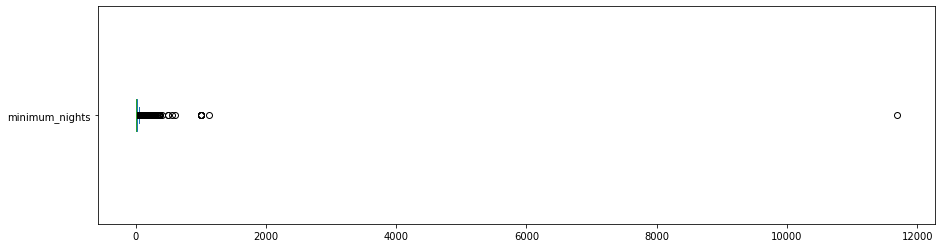

Quantidade de valores acima de 51: 537 entradas
Representa 3.94 % do total de entradas


In [16]:
# Boxplot para outliers da variável mínimo de noite 
df['minimum_nights'].plot.box(vert=False, figsize=(15,4))
plt.show()

print('Quantidade de valores acima de 51: {} entradas'.format(len(df[df.minimum_nights> 51])))
print('Representa {:.2f} % do total de entradas'.format((len(df[df.minimum_nights> 51])/df.shape[0])*100))

Para esse caso existem 537 entradas que são *outliers* acima do limite superior, enquanto que para o valor mínimo de noite não há necessidade de alterar o valor, já que o mínimo é de uma noite. 

### Retirando os *outliners*

Distribuição dos dados aplicando os valores descritos acima como filtros, nas colunas *price* e *minimum_nights*.

In [17]:
# Cópia do Dataset para realizar o filtro nas variáveis.
df_clean=df.copy()
df_clean.drop(df_clean[df_clean.price>350].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price < 20].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights> 51].index, axis=0, inplace=True)


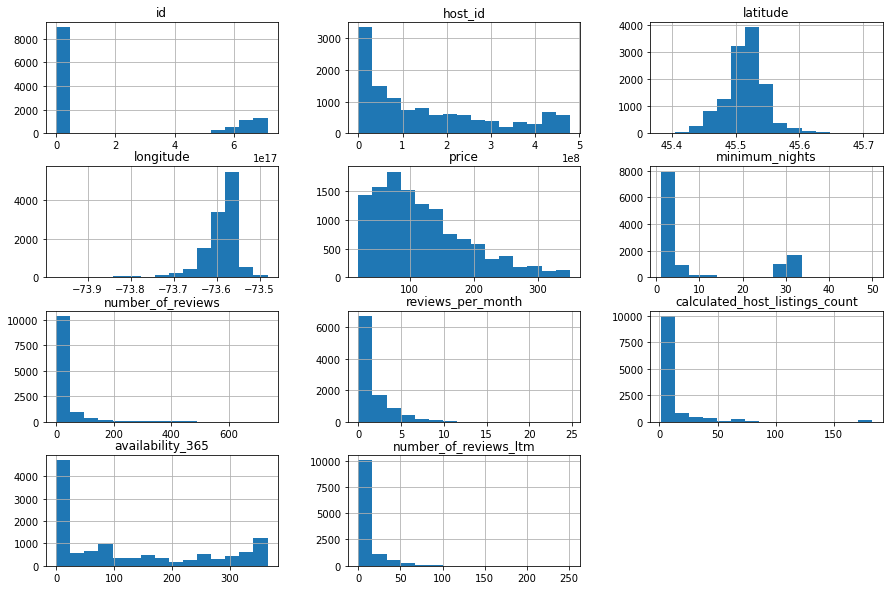

In [18]:
df_clean.hist(bins= 15, figsize=(15,10));

In [19]:
# resumo estatistico das variaveis numéricas 
df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,12101.000000,12101.000000,12101.000000,9970.000000,12101.000000,12101.000000
mean,119.262292,9.234691,24.314106,1.522340,10.492356,121.953971
std,71.840714,12.170223,50.383904,1.895391,25.958872,131.603825
min,20.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,64.000000,1.000000,1.000000,0.160000,1.000000,0.000000
50%,101.000000,2.000000,6.000000,0.750000,1.000000,74.000000
75%,159.000000,14.000000,24.000000,2.260000,6.000000,253.000000
max,350.000000,50.000000,734.000000,24.730000,183.000000,365.000000


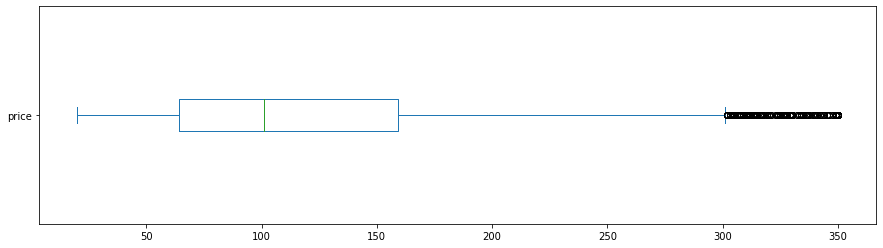

In [20]:
#Boxplot dos preço sem os outlier
df_clean['price'].plot.box(vert=False, figsize=(15,4));

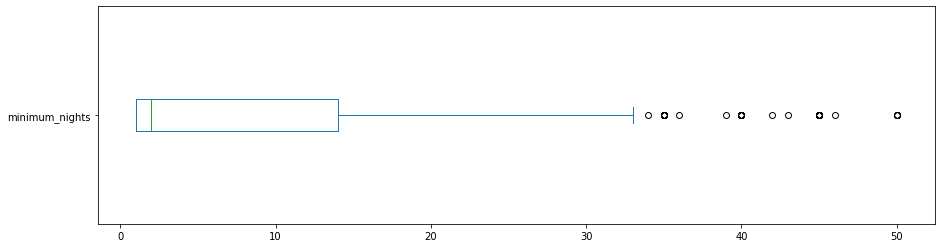

In [21]:
#Boxplot para mínimo de noite sem os outlier
df_clean['minimum_nights'].plot.box(vert=False, figsize=(15,4));

Após a retirada dos *outliers* o valor da média diminuiem ambas as colunas, com resultado mais expressivo na *price*.
* A distribuição no histograma, da coluna preço, demonstra  concentração dos valores entre 20-200, ou seja, há predominio de imóveis mais baratos. 
*O histograma da coluna minimo de noites, demonstra muitos imóveis com intervalo de poucos dias, e alguns pequenos pico de imoveis com quantidade de dias maior (30 dias).

### **Q4. Qual a média dos preços de aluguel?**

In [22]:
# ver a média da coluna 'price'.
print('A média de preço do Dataset com outliers é {:.2f}'.format(df.price.mean()))
print('A média de preço do Dataset sem outliers é {:.2f}'.format(df_clean.price.mean()))

A média de preço do Dataset com outliers é 169.03
A média de preço do Dataset sem outliers é 119.26


In [23]:
#diferença dos valores.
df.price.mean() - df_clean.price.mean()

49.766780382773106

Com a retirada dos *outliers*, usando valor de 350 como filtro, a média diminuiu em 50 doláres. Com esse tratamento nos dados o descolamento entre média e mediana foi reduzido.


### **Q4. Qual a correlação existente entre as variáveis**

Busca entender a relação entre duas variáveis. O resultado aqui é apresentado em nivel de intensidade, podendo variar de 1 a -1.

In [24]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
corr

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.127011,0.103775,0.272140,0.165553,0.197470
minimum_nights,-0.127011,1.000000,-0.083792,-0.276428,0.205860,0.194882
number_of_reviews,0.103775,-0.083792,1.000000,0.386113,-0.048942,0.063262
reviews_per_month,0.272140,-0.276428,0.386113,1.000000,0.071720,0.214894
calculated_host_listings_count,0.165553,0.205860,-0.048942,0.071720,1.000000,0.057901
availability_365,0.197470,0.194882,0.063262,0.214894,0.057901,1.000000


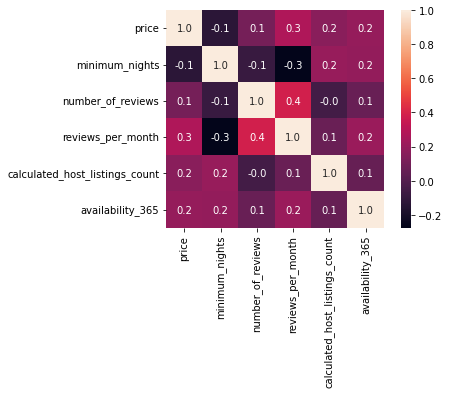

In [25]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, fmt = '.1f', square=True, annot=True);

Não existe fortes correlações dentro do Dataset. No mapa de calor é possivel destacar:
* Os maiores valores são 0.4 das variaveis de atreladas a reviews, ou seja imóveis com maior quantidade de review tentarão um tendência de ter maior quantidade de review no mês. 
* Imóveis com períodos maiores na variável *minimum_nights* teram menos reviews por mês, já que menos pessoas poderão alugá-lo.

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [26]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

Entire home/apt    10523
Private room        2991
Shared room           70
Hotel room            37
Name: room_type, dtype: int64

In [27]:
# mostrar a porcentagem de cada tipo de imóvel disponível
((df.room_type.value_counts() / df.shape[0])*100).head()

Entire home/apt    77.255708
Private room       21.958740
Shared room         0.513912
Hotel room          0.271639
Name: room_type, dtype: float64

O tipo de imóvel com maior quantidade disponível "Entire home/apt". Nesse tipo de aluguel a pessoa aluga todo o espaço da casa ou apartamento. 

### **Q6. Qual a localidade mais cara do dataset?**



In [28]:
# ver preços por bairros, na média
df.groupby('neighbourhood').price.mean().sort_values(ascending=False)

neighbourhood
L'Île-Bizard-Sainte-Geneviève               308.717391
Baie-d'Urfé                                 253.166667
Hampstead                                   253.111111
Pierrefonds-Roxboro                         211.231884
Kirkland                                    205.125000
Le Plateau-Mont-Royal                       200.135021
Le Sud-Ouest                                192.594146
Ville-Marie                                 190.227530
Westmount                                   190.081967
Dorval                                      185.241379
Lachine                                     174.509804
Outremont                                   171.891473
Côte-Saint-Luc                              170.647059
Dollard-des-Ormeaux                         163.593750
Senneville                                  151.000000
Rivière-des-Prairies-Pointe-aux-Trembles    145.934426
Mercier-Hochelaga-Maisonneuve               140.640584
Saint-Léonard                               137.228

In [29]:
#comparativo com preço do Dataset sem outliers
df_clean.groupby('neighbourhood').price.mean().sort_values(ascending=False)

neighbourhood
Baie-d'Urfé                                 190.000000
Kirkland                                    163.000000
L'Île-Bizard-Sainte-Geneviève               159.270270
Senneville                                  151.000000
Ville-Marie                                 141.043639
Westmount                                   139.884615
Dorval                                      128.200000
Le Sud-Ouest                                123.010417
Pierrefonds-Roxboro                         123.000000
Côte-Saint-Luc                              122.630435
Pointe-Claire                               122.153846
Mont-Royal                                  120.886364
Le Plateau-Mont-Royal                       120.274241
Saint-Laurent                               118.880000
Dollard-des-Ormeaux                         116.250000
Hampstead                                   114.000000
Outremont                                   113.675439
Lachine                                     113.659

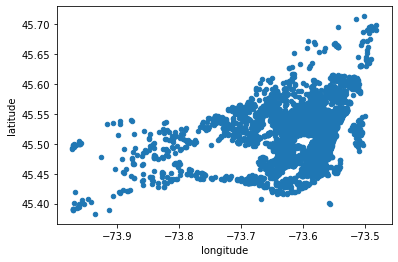

In [30]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind= 'scatter', x='longitude', y='latitude');

In [31]:
#Mapa interativo 
fig = px.scatter_mapbox(
      df_clean,
      lat='latitude',
      lon='longitude',
      size = 'price',
      color = 'minimum_nights',
      color_continuous_scale=px.colors.cyclical.IceFire,
      size_max=15,
      zoom=10
  )

fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(height=600, margin={"r":0, "t":0, "l":0, "b":0})


No foi utilizado dois parâmetros, o *color* essa atrelado a quantidade de noite, enquanto que, o *size* está atrelado ao preço.

Com mapa fica evidenciado:

* A região sudoeste possui as médias dos preço mais elevadas.
* A região leste possui maior concentração de imóveis disponíveis.
* Os pontos maiores são imóveis com valores mais altos de aluguel. Esses  imóveis aparentam estar distribuidos "igualmente" pela cidade.


### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [32]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

9.234691347822494

## Conclusões


Ao analisar essa versão resumida do Dataset, é possível concluir que os imóveis, em relação ao preço, estão bem distribuidos pela cidade. A região leste é a parte da cidade com maior quantidade de imóveis disponiveis para locação, com mais variadas quantidades de minimo de noites possíveis. A região sudoeste, que possui as maiores médias de preço, os imóveis estão localizados e regiões proximas dos lagos e em uma ilha, o que talvez justifique os preços mais elevados devido "exclusividade" do local.

O dataset apresenta alguns valores que não fazem sentido na análise, como por exemplo mais 100 imóveis com valor abaixo de 20 dolares, muitos destes com valor 0. Outro exemplo, são os imóveis com exigência que ultrapassam 2 anos, como mínimo de noite. Imóveis nessas condições foram considerados *outliers* e retirados para continuar a análise.

Além disso, foi possivél observar que os dados não possuem grande correlação entre si, tendo em alguns casos ter uma correlação negativa. 